In [2]:
#load up modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import pickle
import os

import category_encoders as ce

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm
from sklearn.preprocessing import PolynomialFeatures

import tensorflow as tf
from tensorflow import keras
from keras import layers

In [3]:
#Get dir
path="D:/Kuliah/Semester 5/PSD/psd-challenge/"
os.listdir(path)

def savefile(result, savename):
    try:
        pd.DataFrame(zip(range(1,len(result)+1),result), columns=["No", "UHH"]).to_csv(path+"Kerja lah su/"+savename+".csv", index=False)
    except:
        print("It only saves the result retard!")

In [4]:
#Get dataset                                #Gw baru nyadar train di split lagi?
test_data=pd.read_excel(path+"Test.xlsx")
train=pd.read_excel(path+"Train.xlsx")

In [5]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [6]:
def rsq_plot(history):
  plt.plot(history.history['r2score'], label='r2score')
  plt.plot(history.history["val_r2score"], label='val_r2score')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('rsq')
  plt.legend()
  plt.grid(True)

In [7]:
def r2score(y_true, y_pred):
    SS_res =  keras.backend.sum(keras.backend.square( y_true-y_pred ))
    SS_tot = keras.backend.sum(keras.backend.square(y_true - keras.backend.mean(y_true)))
    return (1 - (SS_res/SS_tot))

In [26]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(16, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(), metrics=r2score)
  return model

In [27]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

In [28]:
train_data, validation_data, train_value, validation_value= train_test_split(poly_features, y, train_size=0.9)

normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_data))

dnn_model = build_and_compile_model(normalizer)

history=dnn_model.fit(train_data, train_value, verbose=1, validation_data=(validation_data, validation_value), epochs=100)

Epoch 1/100
240/240 [==============================] - 2s 5ms/step - loss: 18.0123 - r2score: -7.4089 - val_loss: 7.4213 - val_r2score: -0.0976
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 7.3217 - r2score: -0.0787 - val_loss: 6.9742 - val_r2score: 0.0333
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 6.9378 - r2score: 0.0369 - val_loss: 6.6609 - val_r2score: 0.1313
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 6.6852 - r2score: 0.1118 - val_loss: 6.6126 - val_r2score: 0.1475
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 6.5556 - r2score: 0.1429 - val_loss: 6.5974 - val_r2score: 0.1356
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 6.5302 - r2score: 0.1490 - val_loss: 6.4175 - val_r2score: 0.1871
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 6.5016 - r2score: 0.1544 - val_loss: 6.5043 - val_r2score: 0.1783
Epoch 8/1

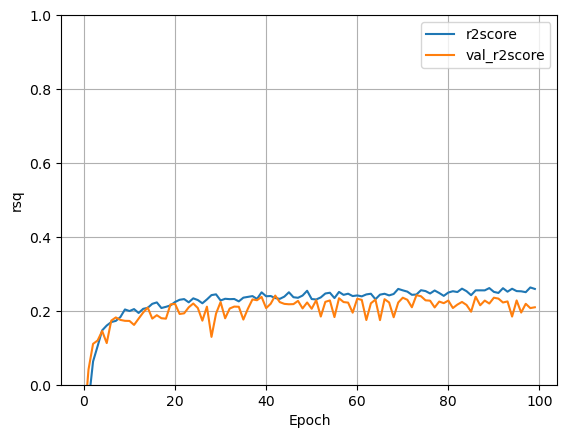

In [25]:
rsq_plot(history)